In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

**First We will load The training data and display the dataframe. The first 5 and last 5 entries of the data is displayed. Each entry contains 54 Features and their class labels.**

**Class Labels range from 1 to 7.**


In [ ]:
#Load train data into dataframe
df = pd.read_csv('train.csv')
df['Cover_Type'].value_counts()
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


**Check balance of Classes in our dataframe:**

We can see that each class contains 2160 rows for a total of 15120. If a class has a much larger amount of rows compared to another then we would have had to use oversampling or undersampling to even that number out, However in this case, nothing needs to be done since it's already balanced.

In [ ]:
df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

**I. Statistical Details:**






**First we Display the statistical details of the dataframe using Describe(). The ID row and Cover_Type can be ignored during this step.**

**We can observe that the features are not on the same scale which means normalizing our data later on could help us improve our model.**

Soil type 7 and 15 are both 0 which means we can remove them from the dataframe.

In [ ]:
df.iloc[:, 1:].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

**During this step we will check for duplicates or missing values:**

We can see that this dataset contains no missing values and no duplicates.


In [ ]:
#Check for null values
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [ ]:
#Check for duplicates 
duplicate = df.duplicated().unique()
duplicate

array([False])

**II. Visualize The Data:**

In this part we will try to visualize the data using different techniques:


**First we will separate the dataframe to get the continous data from it.**

In [ ]:
discreteCols = df.iloc[:,1:11]
discreteCols

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282
15116,2603,121,19,633,195,618,249,221,91,1325
15117,2492,134,25,365,117,335,250,220,83,1187
15118,2487,167,28,218,101,242,229,237,119,932


**In this step, we plot different histograms of the continous data.**
*   We color code each one of the classes to try and observe class separation.

*   The best class separation result is Elevation, however there isn't as much class separation visible in the remaining histograms.




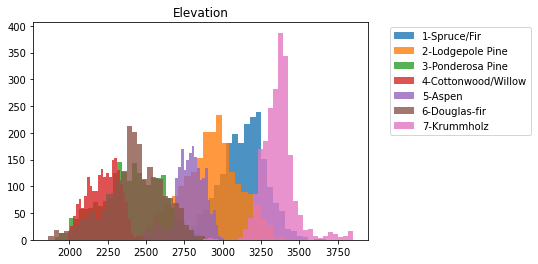

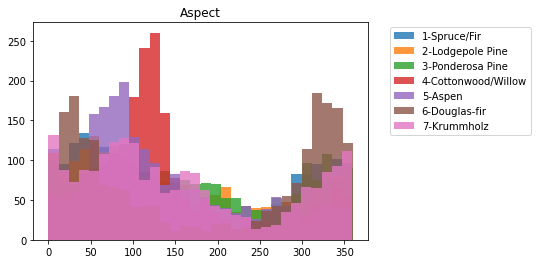

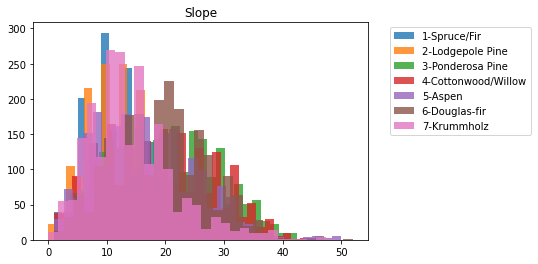

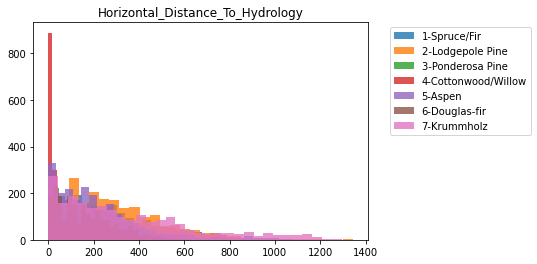

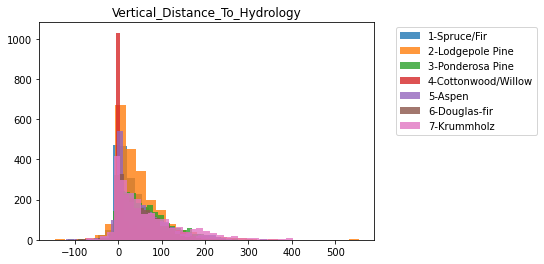

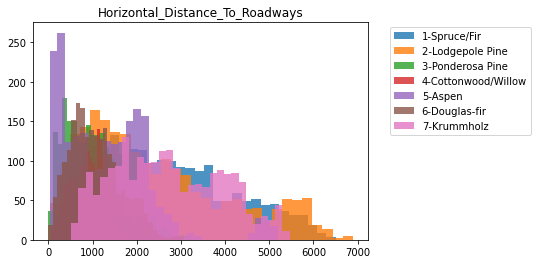

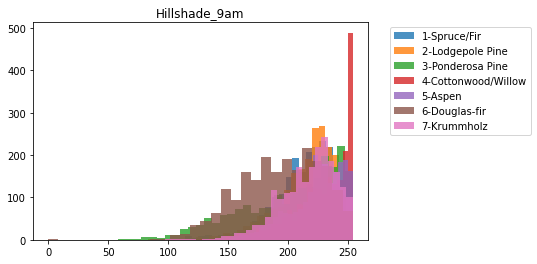

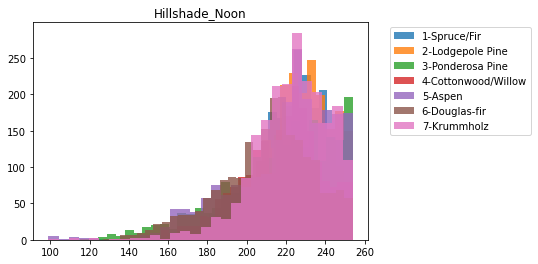

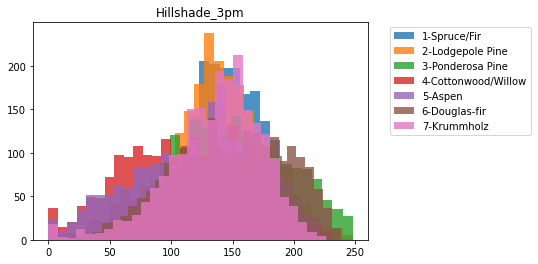

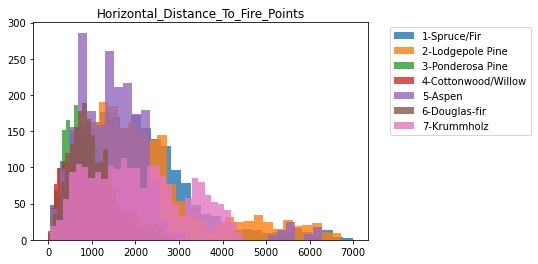

In [ ]:

className = {1: "1-Spruce/Fir", 2: "2-Lodgepole Pine", 3: "3-Ponderosa Pine", 4: "4-Cottonwood/Willow", 5: "5-Aspen", 6: "6-Douglas-fir", 7: "7-Krummholz"}
uniqueClass = np.sort(df.Cover_Type.unique())
#print(className[1])
for i, col in enumerate(discreteCols.columns):
  newHist = plt.figure().add_subplot()
  for classes in uniqueClass:
    temp = discreteCols.loc[df.Cover_Type == classes]
    plt.hist(temp[col], bins = 30,label = className[classes], alpha = 0.8)
  newHist.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  newHist.set_title(col)
plt.show()

**Next, we will visualize the frequency of the remaining features:**

The remaining features will be split into Wilderness Area and Soil Type to visualize their frequency by class type.

One-Hot encoding was used for these 2 features:
*   Wilderness Area consists of 4 different areas.
*   Soil Type consists of 40 different soil types.

In [ ]:
#Cover_Type
coverType = df["Cover_Type"]
coverType

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [ ]:
#Slice DF to get wilderness area
wildernessArea =df.iloc[:,11:15]
wildernessArea['Cover Type'] = coverType
wildernessArea

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover Type
0,1,0,0,0,5
1,1,0,0,0,5
2,1,0,0,0,2
3,1,0,0,0,2
4,1,0,0,0,5
...,...,...,...,...,...
15115,0,0,1,0,3
15116,0,0,1,0,3
15117,0,0,1,0,3
15118,0,0,1,0,3


In [ ]:
plotWilderness = wildernessArea.groupby(['Cover Type'])[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']].sum()
plotWilderness

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover Type,,,,
1,1062,181,917,0
2,1134,66,940,20
3,0,0,863,1297
4,0,0,0,2160
5,856,0,1304,0
6,0,0,962,1198
7,545,252,1363,0


<function matplotlib.pyplot.show>

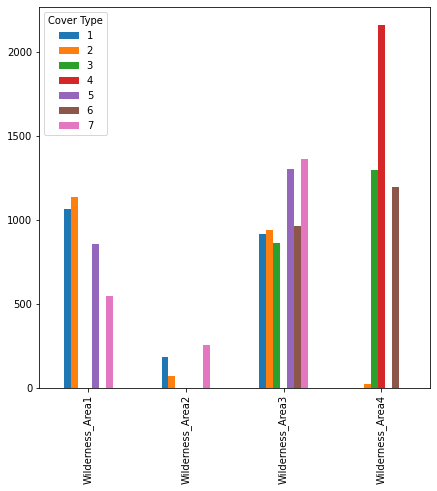

In [ ]:
plotWilderness.T.plot(kind= 'bar', figsize= (7,7))
plt.show

In [ ]:
#Slice DF to get Soil Types
soilType = df.iloc[:,15:-1]
soilType["Cover Type"] = coverType
soilType

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover Type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
sType = ['Soil_Type1',	'Soil_Type2',	'Soil_Type3',	'Soil_Type4',	'Soil_Type5',	'Soil_Type6',	'Soil_Type7',	'Soil_Type8',	'Soil_Type9',	'Soil_Type10',	'Soil_Type11',	'Soil_Type12',	'Soil_Type13',	'Soil_Type14',	'Soil_Type15',	'Soil_Type16',	'Soil_Type17',	'Soil_Type18',	'Soil_Type19',	'Soil_Type20',	'Soil_Type21',	'Soil_Type22',	'Soil_Type23',	'Soil_Type24',	'Soil_Type25',	'Soil_Type26',	'Soil_Type27',	'Soil_Type28',	'Soil_Type29',	'Soil_Type30',	'Soil_Type31',	'Soil_Type32',	'Soil_Type33',	'Soil_Type34',	'Soil_Type35',	'Soil_Type36',	'Soil_Type37',	'Soil_Type38',	'Soil_Type39',	'Soil_Type40']

In [ ]:
plotSoilType = soilType.groupby(['Cover Type'])[sType].sum()
plotSoilType

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,0,1,9,5,24,17,0,0,9,2,0,15,41,12,275,376,128,0,7,7,0,407,81,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,0,1,9,81,67,203,84,0,0,14,7,16,13,55,0,54,149,72,1,19,5,6,554,144,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,0,717,89,0,4,4,0,5,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,0,170,24,0,0,128,0,40,350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,0,64,154,0,305,0,0,9,131,44,18,6,0,0,157,11,0,28,0,3,254,480,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,0,1101,67,0,66,37,0,37,88,0,0,37,0,0,3,15,0,0,0,0,0,0,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,72,31,0,0,3,0,76,20,27,70,67,4,98,8,34,641,575,407


**Something we get from these bar plots is that soil type 7 and 15 are present in 0 row and as for soil type 8, it is present only once in the entire dataset.
We also get the frequency of the remaining soil types depending on the class they belong to**


<function matplotlib.pyplot.show>

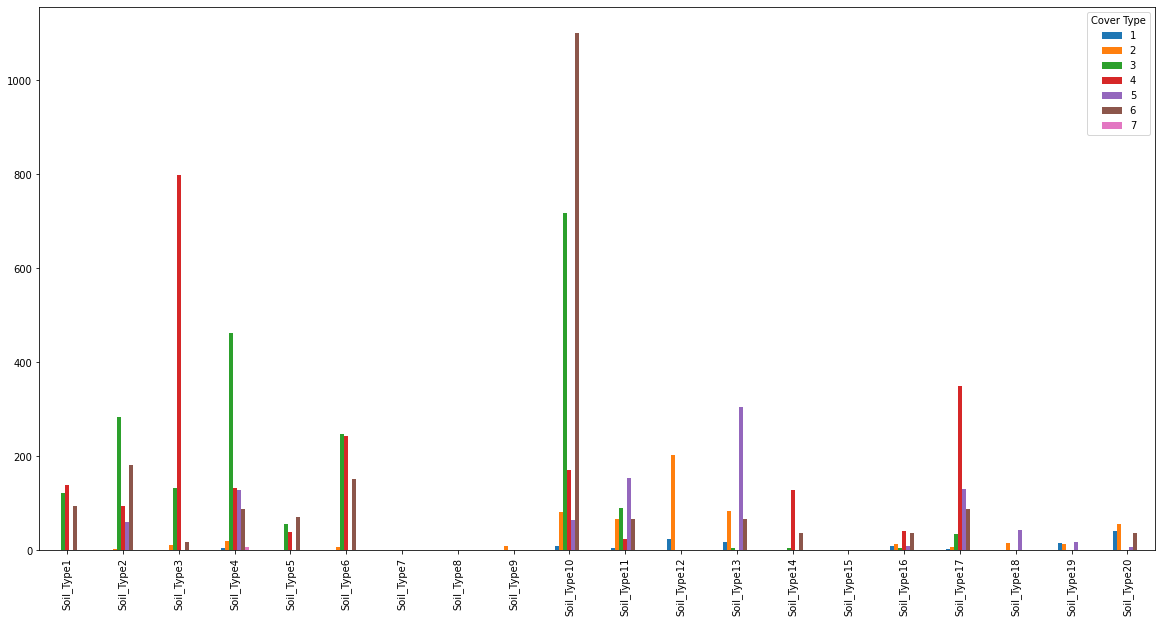

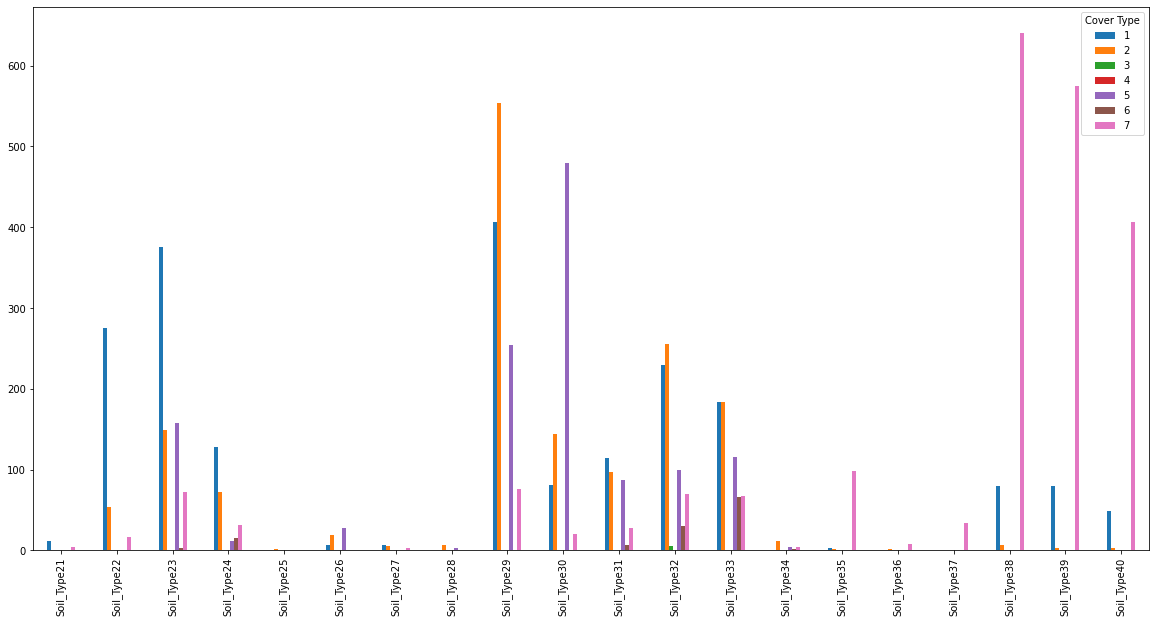

In [ ]:
plot1 = plotSoilType.iloc[:,:20]
plot2 = plotSoilType.iloc[:,20:40]


plot1.T.plot(kind= 'bar', figsize= (20,10))
plot2.T.plot(kind= 'bar', figsize= (20,10))
plt.show

Correlation Matrix of discrete cols:

In [ ]:
correlationM = discreteCols.corr()
correlationM

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


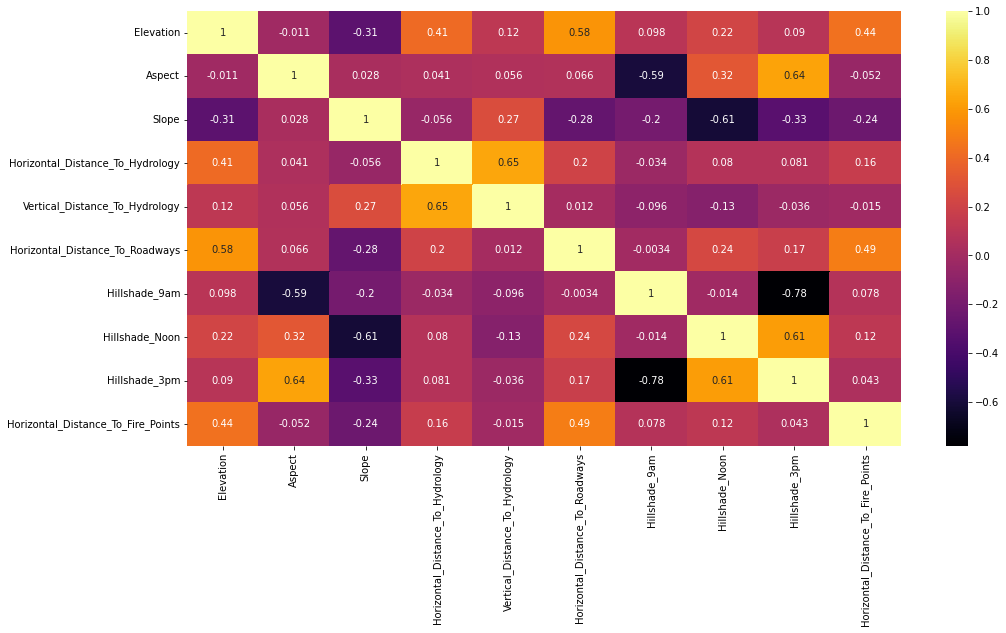

In [ ]:
#Heat map of correlation 
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(correlationM,cmap="inferno",annot=True);

In [ ]:
#Correlations higher than 0.4 and less than 0.5

correlationsToMap = [ ["Horizontal_Distance_To_Roadways","Elevation"],["Horizontal_Distance_To_Fire_Points","Elevation"],
                     ["Hillshade_9am","Aspect"],["Hillshade_3pm","Aspect"],
                     ["Hillshade_Noon","Slope"],["Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Hydrology"],
                     ["Horizontal_Distance_To_Fire_Points","Horizontal_Distance_To_Roadways"],["Hillshade_3pm","Hillshade_9am"],
                     ["Hillshade_3pm","Hillshade_Noon"],["Horizontal_Distance_To_Hydrology","Elevation"],]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

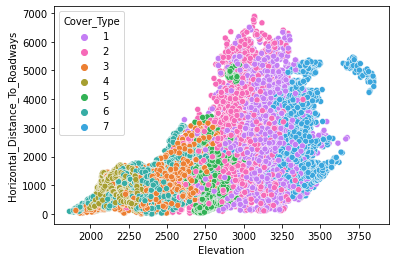

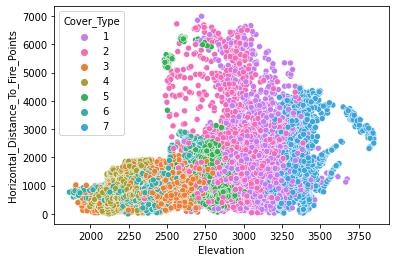

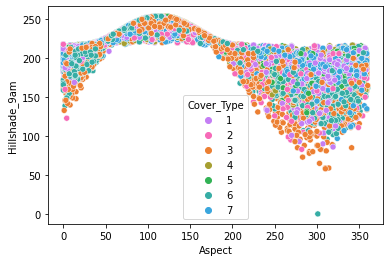

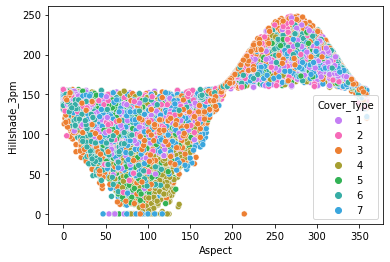

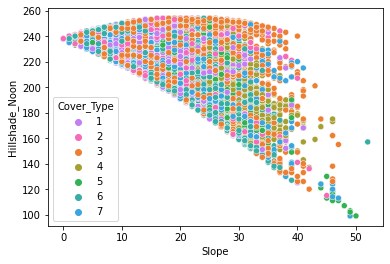

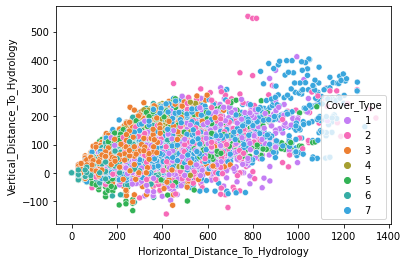

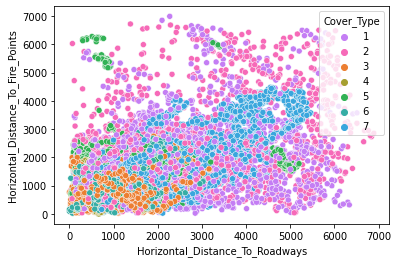

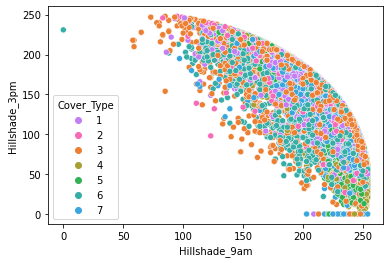

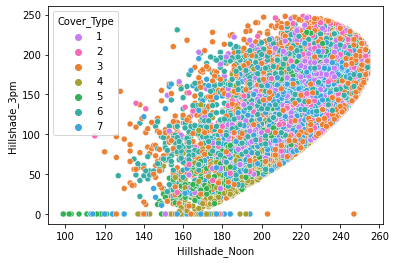

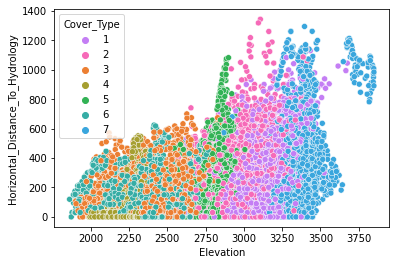

In [ ]:
#Scatter Plot the highest correlated features
for i, cor in enumerate(correlationsToMap):
  plt.figure().add_subplot()
  sns.scatterplot(df[correlationsToMap[i][1]], df[correlationsToMap[i][0]], data = df, hue= coverType, palette=sns.husl_palette(7, h=.8))

plt.show()

**Train models to detect Cover Type**

In [ ]:
Df = df.iloc[:, 1:-1]
Df = Df.drop(Df.columns[6], axis=1)
Df = Df.drop("Hillshade_3pm", axis=1)
Df = Df.drop("Soil_Type7", axis=1)
Df = Df.drop("Soil_Type8", axis=1)
Df = Df.drop("Soil_Type15", axis=1)
Df["Distance To Hydrology"] = (((Df["Horizontal_Distance_To_Hydrology"]**2) + (Df["Vertical_Distance_To_Hydrology"]**2))**0.5).astype('int64')
Df = Df.drop("Horizontal_Distance_To_Hydrology", axis=1)
Df = Df.drop("Vertical_Distance_To_Hydrology", axis=1)
Df= Df.to_numpy()
Df[3]

array([2785,  155,   18, 3090,  238, 6211,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  269])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(Df)
dfaa = pd.DataFrame(data_rescaled)
dfaa

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.369084,0.141667,0.057692,0.074020,0.858065,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190265
1,0.366062,0.155556,0.038462,0.056604,0.877419,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156342
2,0.473817,0.386111,0.173077,0.461538,0.896774,0.875304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202802
3,0.464250,0.430556,0.346154,0.448476,0.896774,0.888174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198378
4,0.368580,0.125000,0.038462,0.056749,0.870968,0.882597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0.374622,0.675000,0.442308,0.095791,0.980645,0.183326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190265
15116,0.372608,0.336111,0.365385,0.089695,0.787097,0.189475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488201
15117,0.316717,0.372222,0.480769,0.048621,0.780645,0.169741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282448
15118,0.314199,0.463889,0.538462,0.035123,0.890323,0.133276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176991


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib.pyplot import plot
normalizedDF = preprocessing.normalize(Df)

pca2 = data_rescaled
Y =data_rescaled
Y.shape


(15120, 48)

In [ ]:
from sklearn.model_selection import KFold

kfoldData = pd.DataFrame(Y)
kfoldData["Cover_Type"] = df["Cover_Type"]
kfoldData = kfoldData.to_numpy()
kfold = KFold(10, True)
#X_train, X_test = X[train], X[test]
#y_train, y_test = Y[train], Y[test]
#

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
X, Y = kfoldData[:, :-1], kfoldData[:, -1:]

accArray = []
confMatrix = []
report = []
for train, test in kfold.split(kfoldData):
  x_train, x_test = X[train], X[test]
  y_train, y_test = Y[train], Y[test]
  knn = KNeighborsClassifier(1)
  knn.fit(x_train, y_train)
  result = knn.predict(x_test)
  acc = accuracy_score(y_test, result)
  clr = classification_report(y_test, result)
  confMatrix.append(confusion_matrix(y_test, result))
  accArray.append(acc)
  report.append(clr)

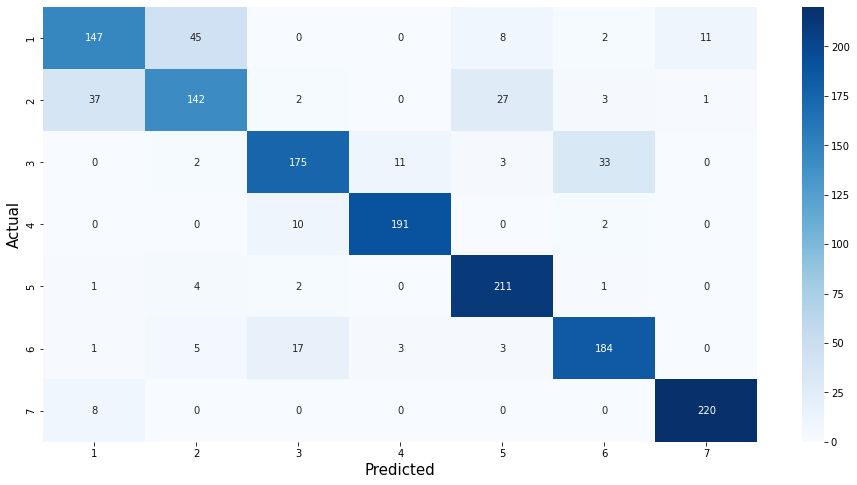

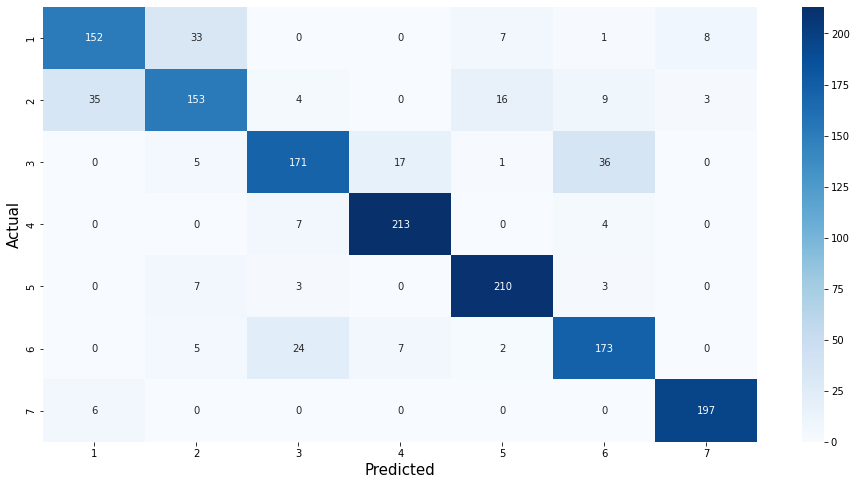

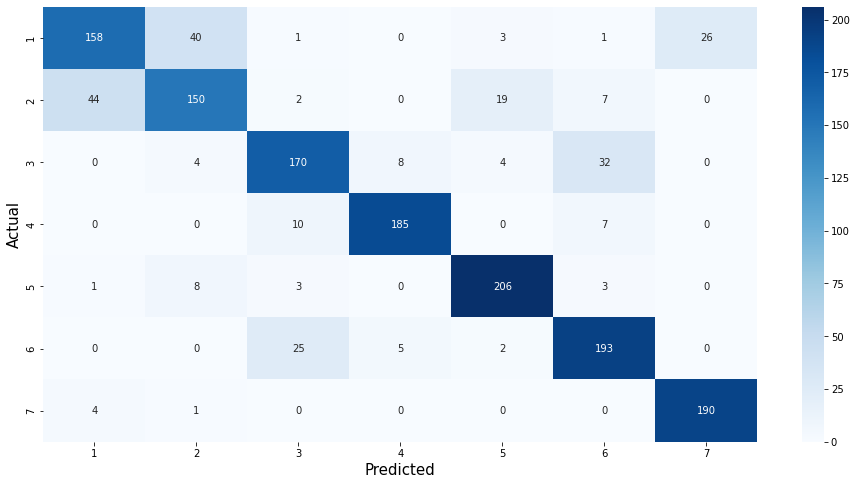

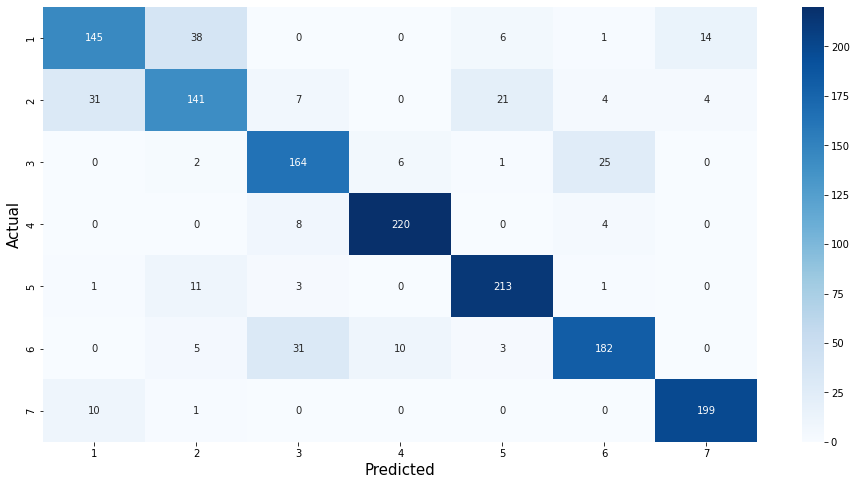

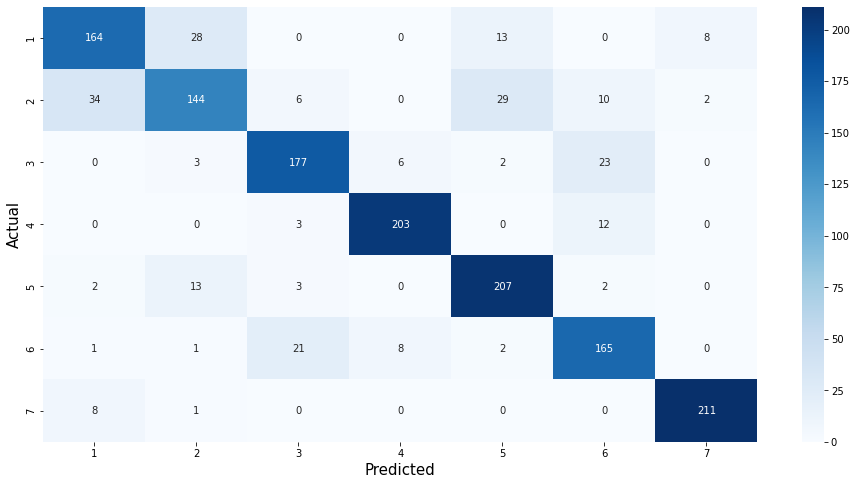

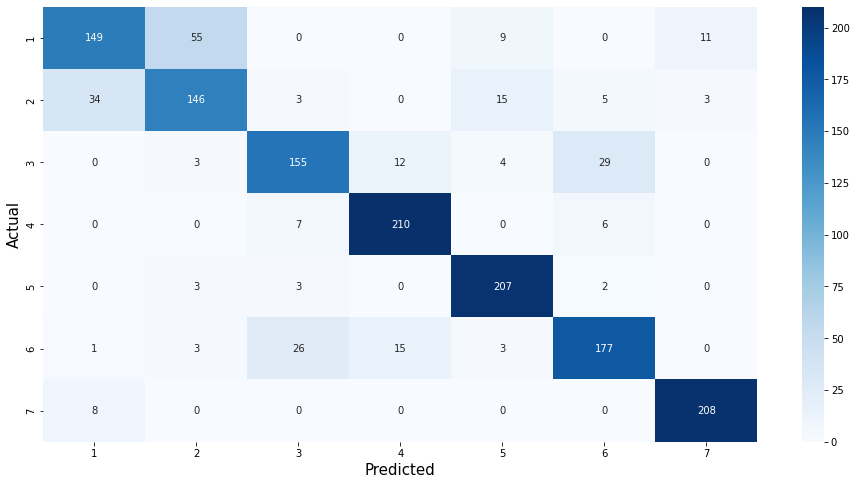

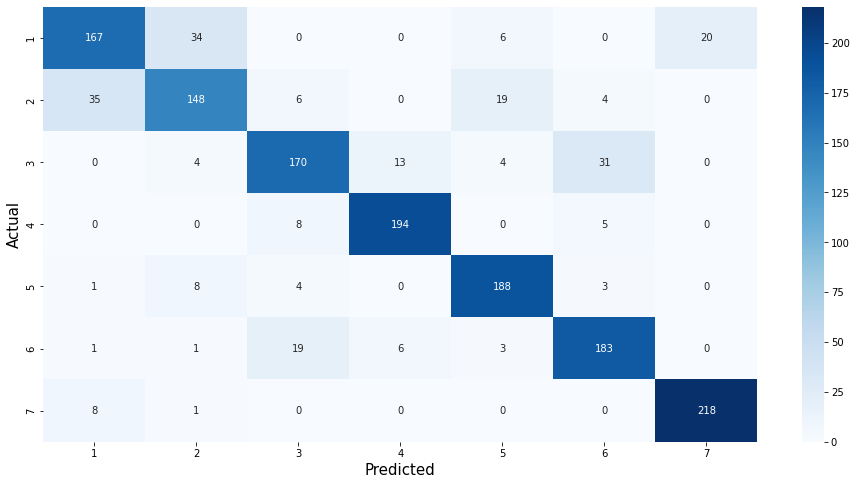

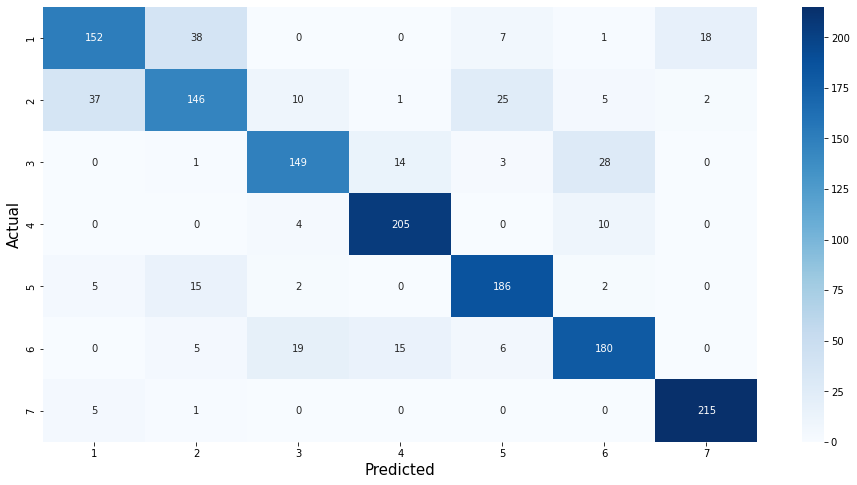

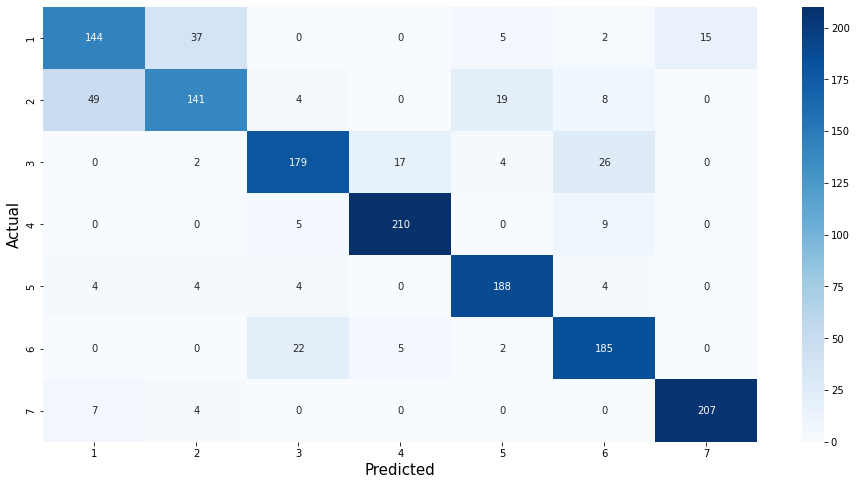

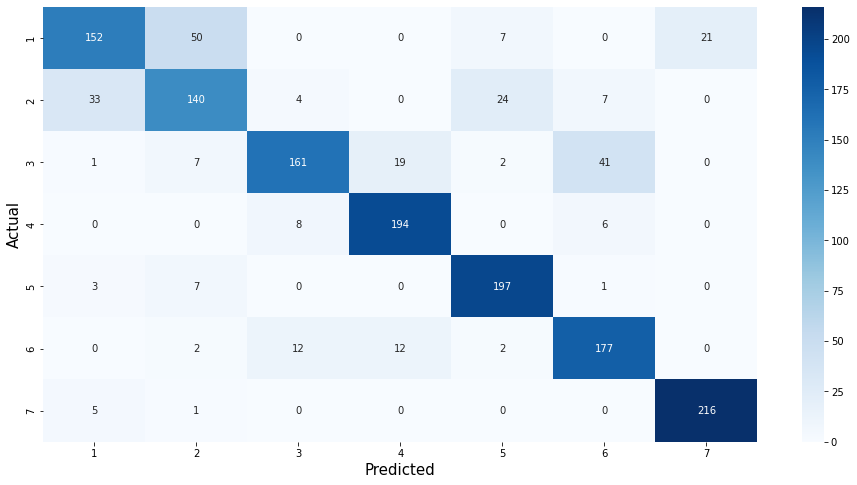

In [ ]:
for m in confMatrix:

  plt.figure(figsize=(16,8)).add_subplot()
  sns.heatmap(m,cmap="Blues",annot=True,fmt='g');

  plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
  plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15
  plt.xticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))
  plt.yticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))


plt.show()

In [ ]:
print("Classification report")
print(report[4])

Classification report
              precision    recall  f1-score   support

         1.0       0.78      0.77      0.78       213
         2.0       0.76      0.64      0.69       225
         3.0       0.84      0.84      0.84       211
         4.0       0.94      0.93      0.93       218
         5.0       0.82      0.91      0.86       227
         6.0       0.78      0.83      0.80       198
         7.0       0.95      0.96      0.96       220

    accuracy                           0.84      1512
   macro avg       0.84      0.84      0.84      1512
weighted avg       0.84      0.84      0.84      1512



In [ ]:

print(np.std(accArray))
np.mean(accArray)

0.008658718438652456


0.8313492063492063

In [ ]:
accArray

[0.83994708994709,
 0.8392857142857143,
 0.828042328042328,
 0.8359788359788359,
 0.8406084656084656,
 0.828042328042328,
 0.8386243386243386,
 0.8154761904761905,
 0.8293650793650794,
 0.8181216931216931]

**Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

accArray = []
confMatrix = []
report = []
for train, test in kfold.split(kfoldData):
  x_train, x_test = X[train], X[test]
  y_train, y_test = Y[train], Y[test]
  clf = RandomForestClassifier(100)
  clf.fit(x_train, y_train)
  result = clf.predict(x_test)
  acc = accuracy_score(y_test, result)
  clr = classification_report(y_test, result)
  confMatrix.append(confusion_matrix(y_test, result))
  accArray.append(acc)
  report.append(clr)

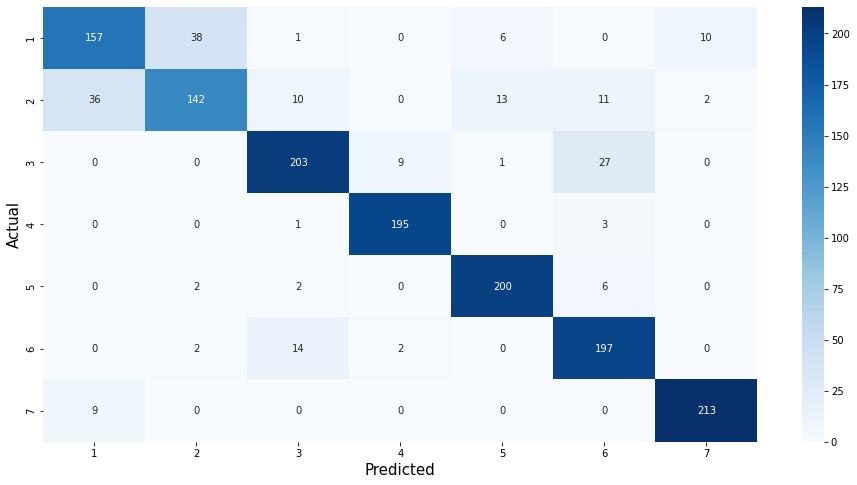

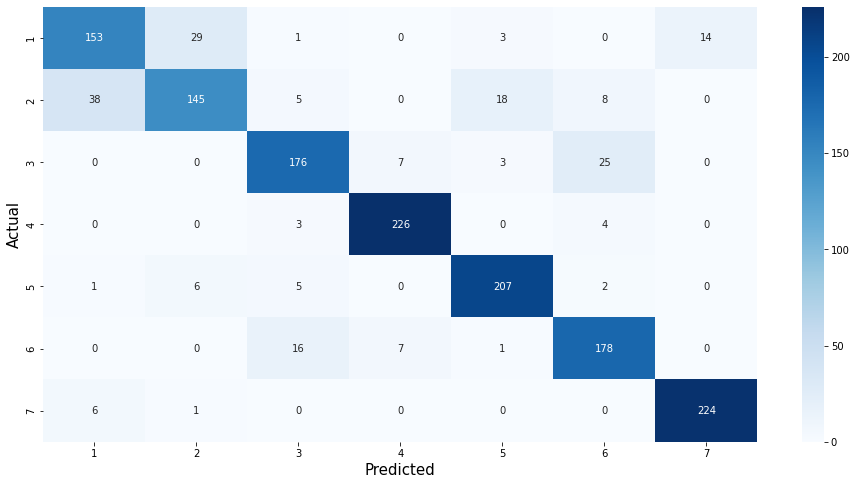

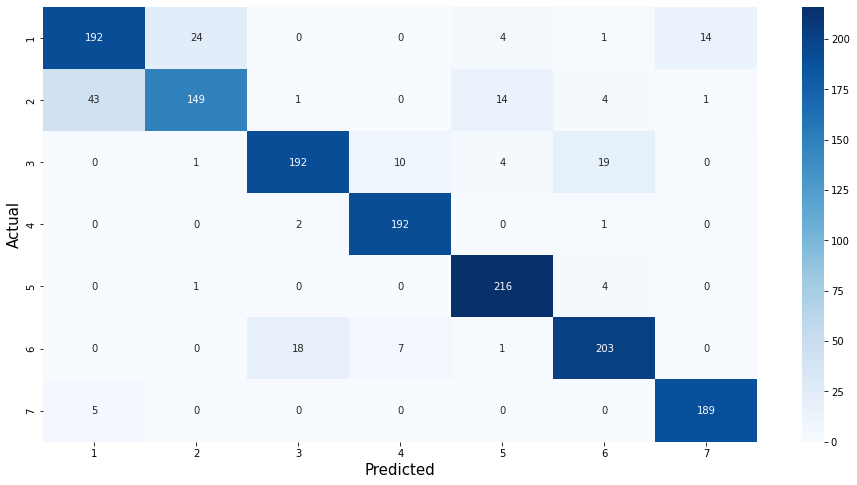

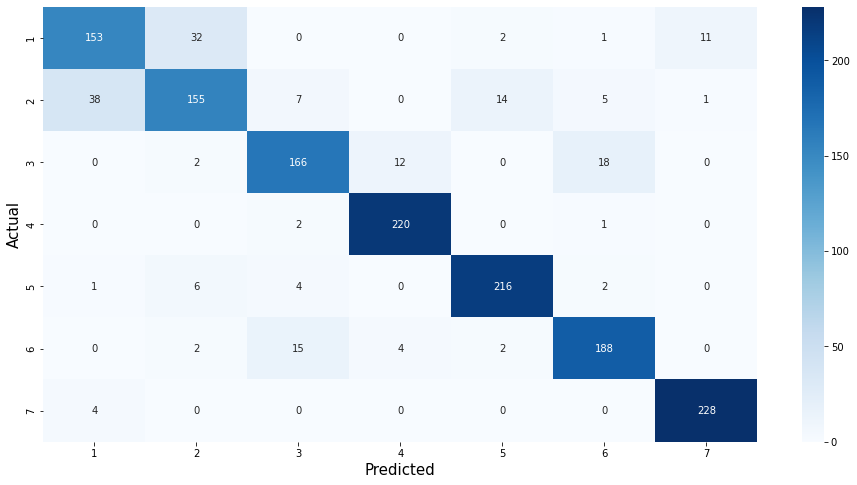

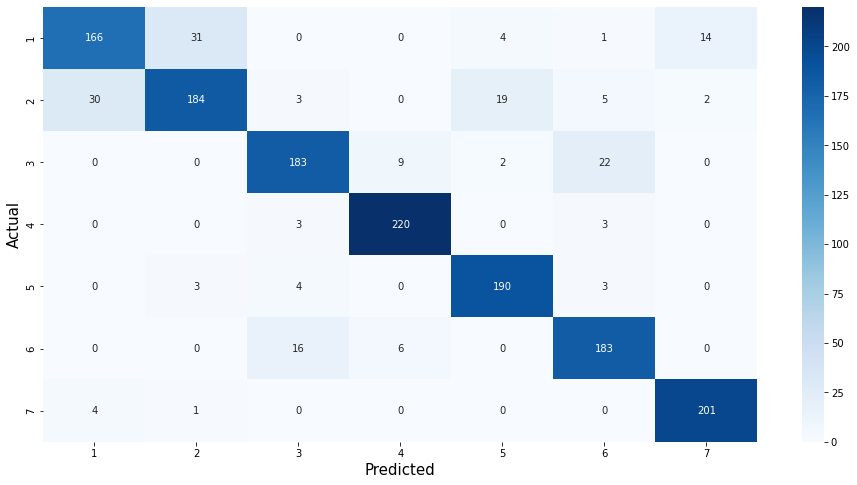

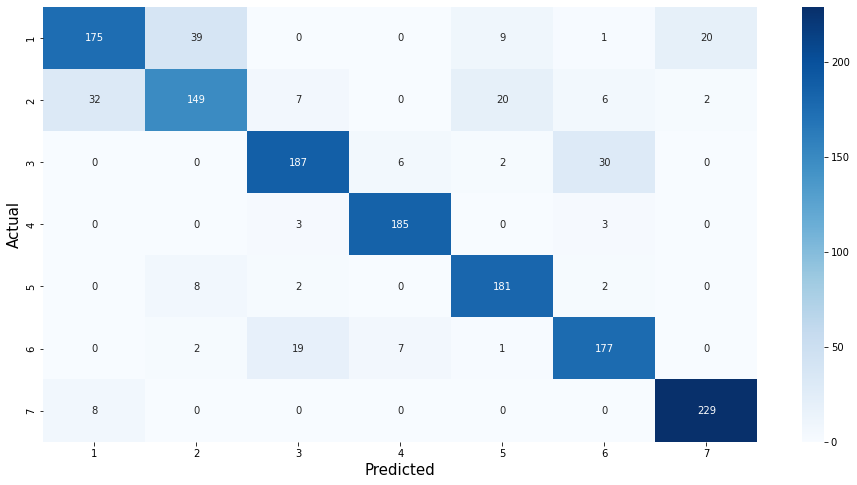

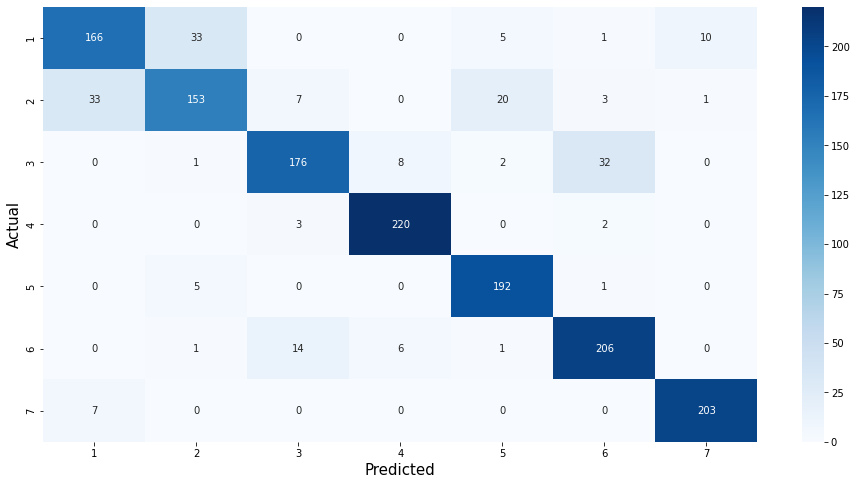

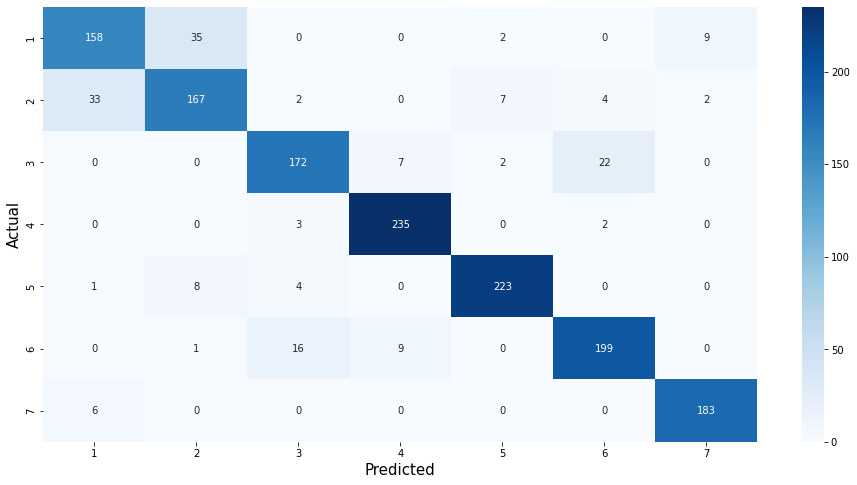

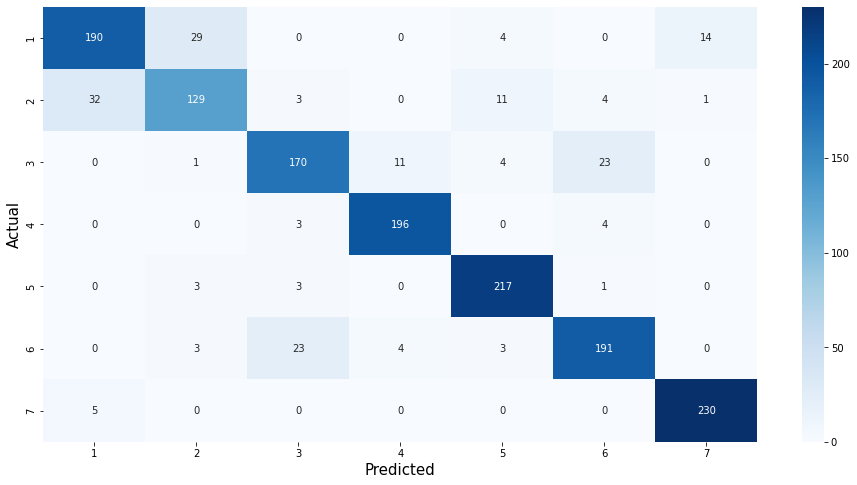

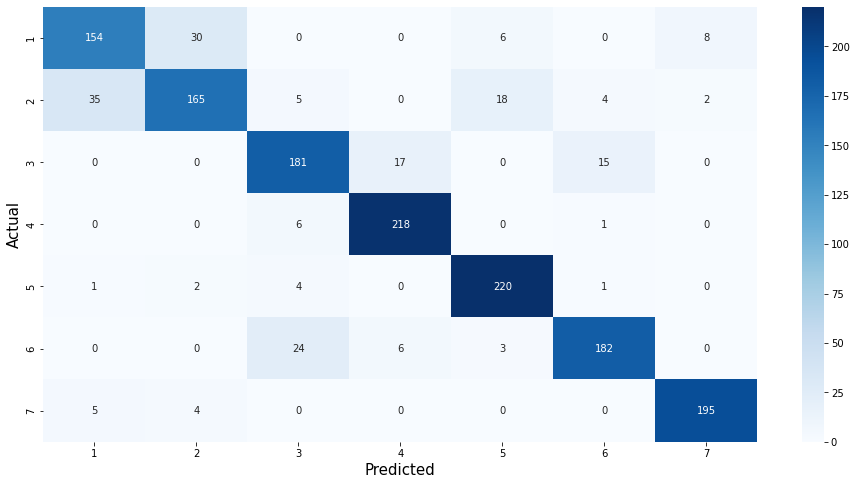

In [ ]:
for m in confMatrix:

  plt.figure(figsize=(16,8)).add_subplot()
  sns.heatmap(m,cmap="Blues",annot=True,fmt='g');

  plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
  plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15
  plt.xticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))
  plt.yticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))


plt.show()

In [ ]:
print("Classification report")
print(report[9])

Classification report
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78       198
         2.0       0.82      0.72      0.77       229
         3.0       0.82      0.85      0.84       213
         4.0       0.90      0.97      0.94       225
         5.0       0.89      0.96      0.93       228
         6.0       0.90      0.85      0.87       215
         7.0       0.95      0.96      0.95       204

    accuracy                           0.87      1512
   macro avg       0.87      0.87      0.87      1512
weighted avg       0.87      0.87      0.87      1512



In [ ]:
accArray

[0.8644179894179894,
 0.8657407407407407,
 0.8816137566137566,
 0.876984126984127,
 0.8776455026455027,
 0.8485449735449735,
 0.8703703703703703,
 0.8842592592592593,
 0.875,
 0.8697089947089947]

In [ ]:
print(np.mean(accArray))
np.std(accArray)

0.8714285714285716


0.009797293220709657

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
accArray = []
confMatrix = []
report = []
for train, test in kfold.split(kfoldData):
  x_train, x_test = X[train], X[test]
  y_train, y_test = Y[train], Y[test]
  nb = GaussianNB()
  nb.fit(x_train, y_train)
  result = nb.predict(x_test)
  acc = accuracy_score(y_test, result)
  clr = classification_report(y_test, result)
  confMatrix.append(confusion_matrix(y_test, result))
  accArray.append(acc)
  report.append(clr)

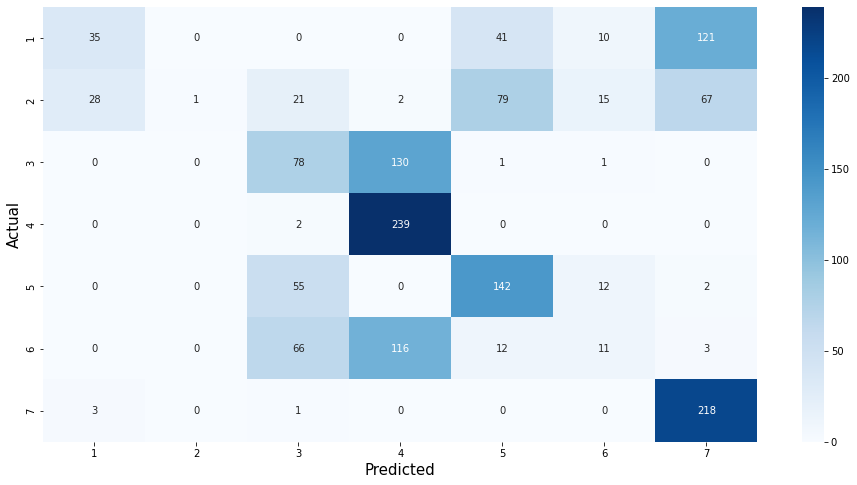

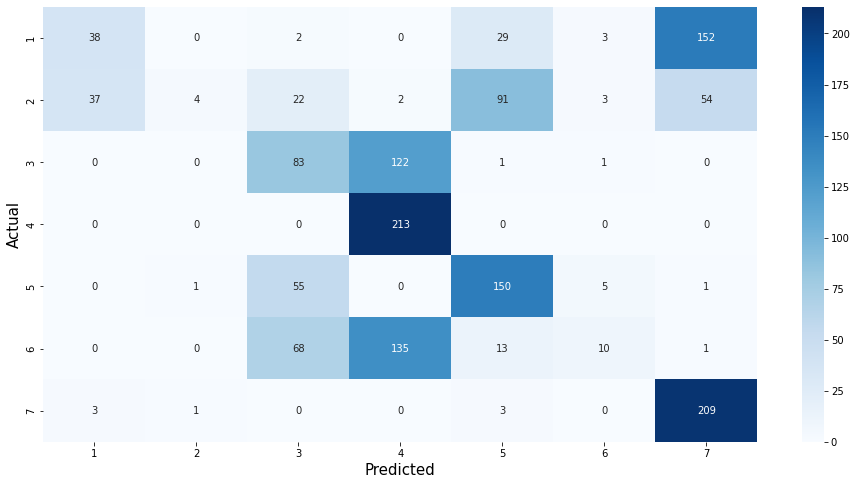

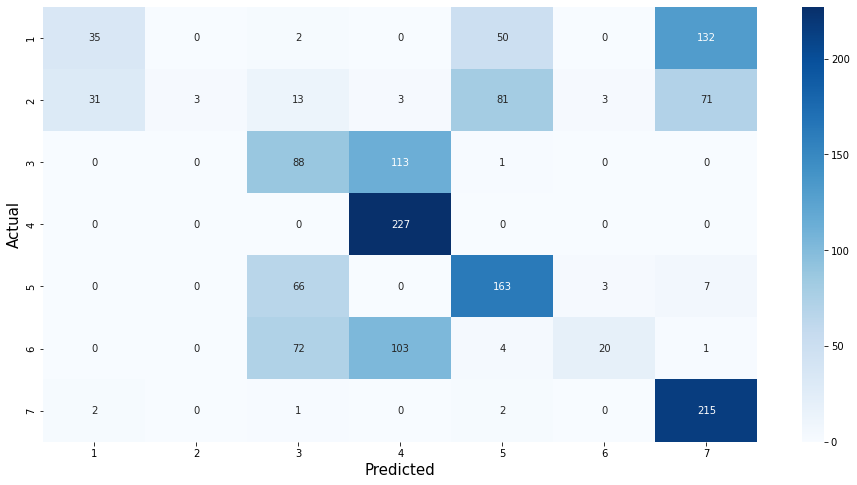

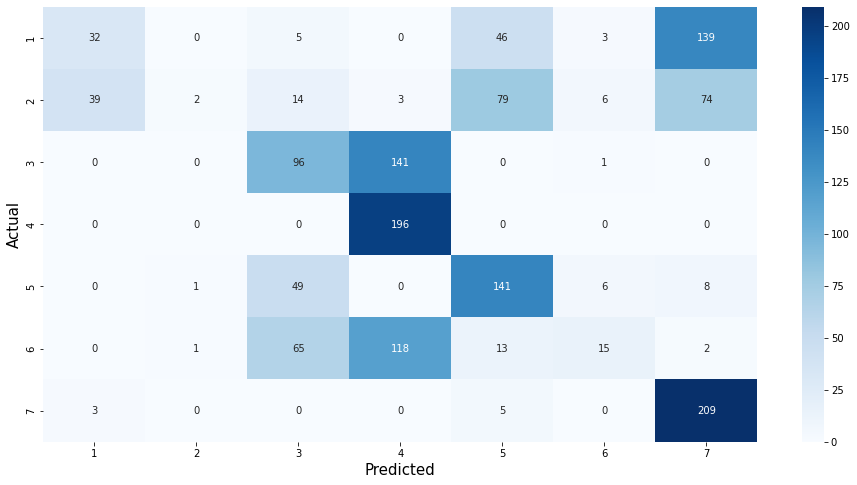

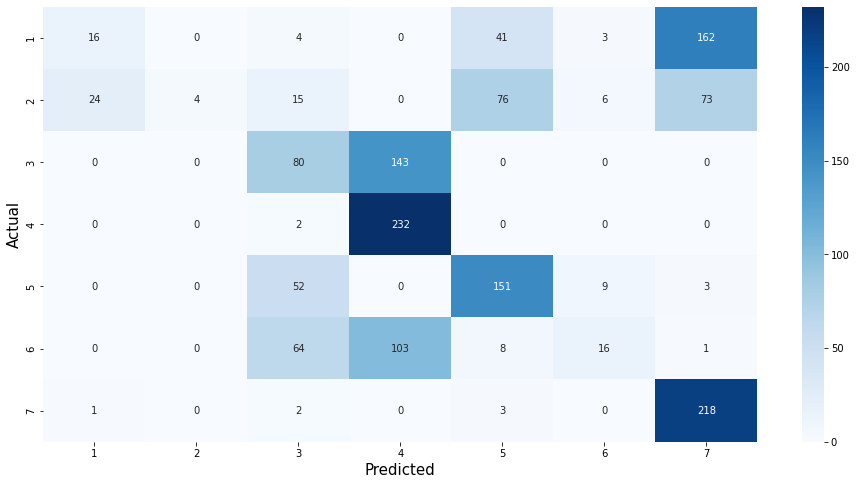

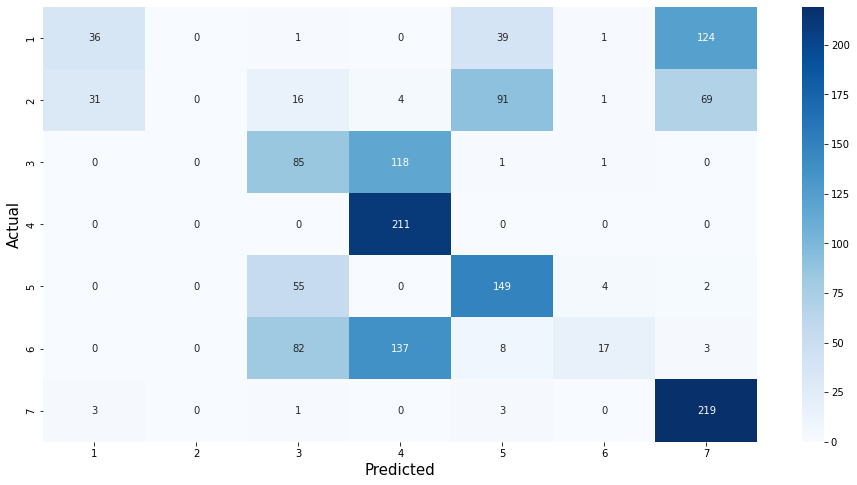

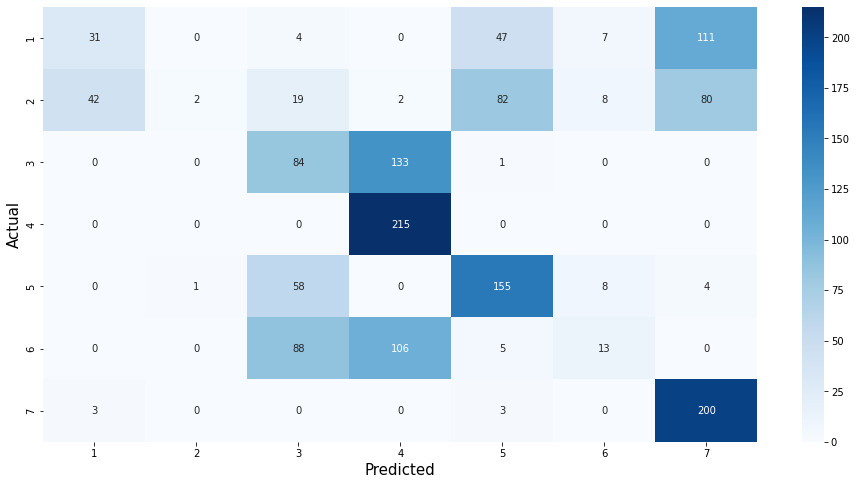

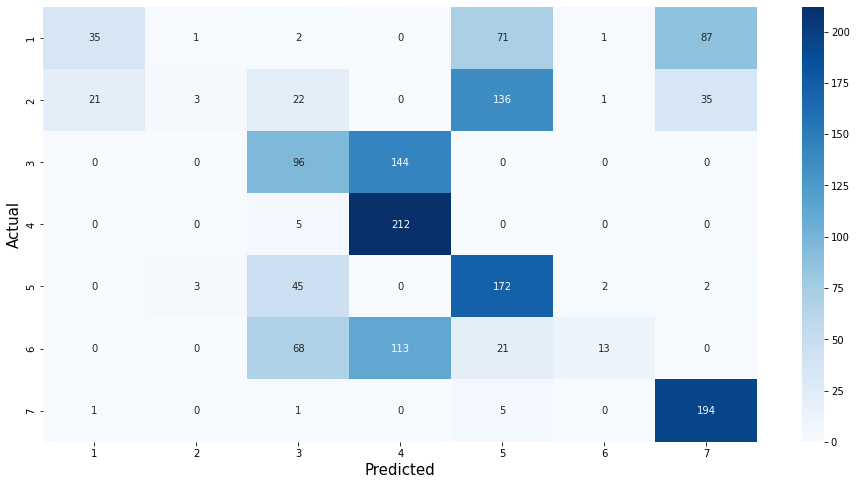

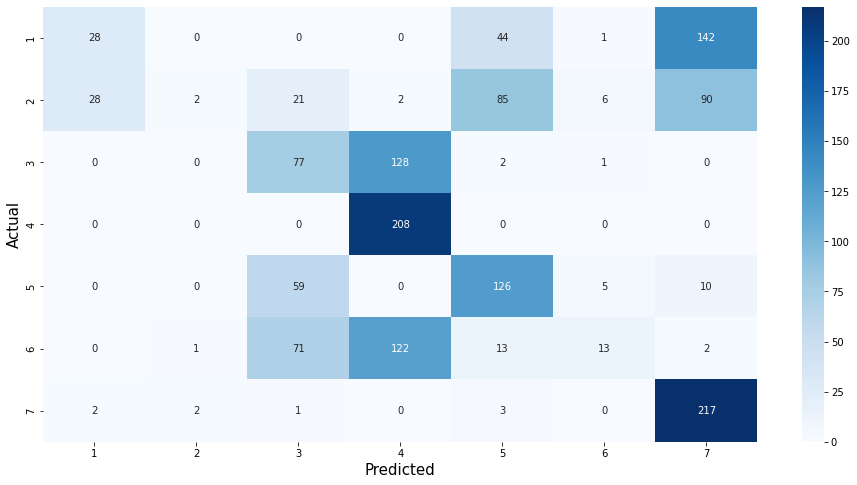

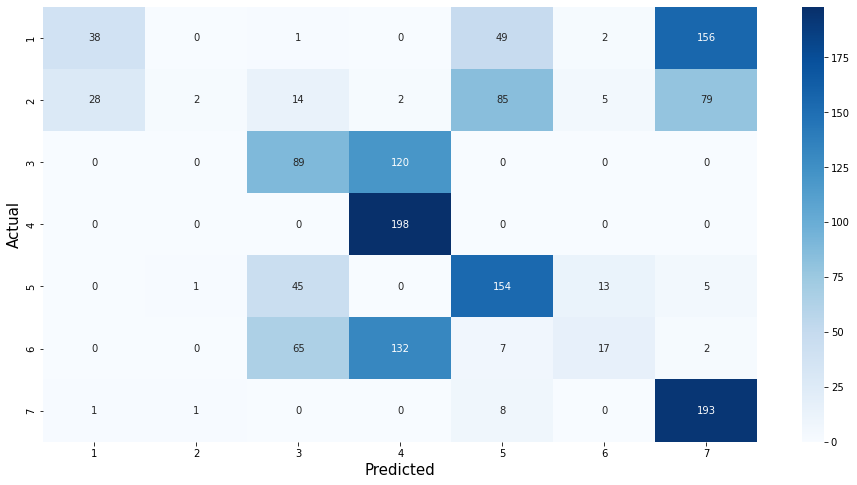

In [ ]:
for m in confMatrix:

  plt.figure(figsize=(16,8)).add_subplot()
  sns.heatmap(m,cmap="Blues",annot=True,fmt='g');

  plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
  plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15
  plt.xticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))
  plt.yticks((0.5, 1.5,2.5,3.5,4.5,5.5,6.5), labels=(1,2,3,4,5,6,7))


plt.show()

In [ ]:
print("Classification report")
print(report[0])

Classification report
              precision    recall  f1-score   support

         1.0       0.53      0.17      0.26       207
         2.0       1.00      0.00      0.01       213
         3.0       0.35      0.37      0.36       210
         4.0       0.49      0.99      0.66       241
         5.0       0.52      0.67      0.58       211
         6.0       0.22      0.05      0.09       208
         7.0       0.53      0.98      0.69       222

    accuracy                           0.48      1512
   macro avg       0.52      0.46      0.38      1512
weighted avg       0.52      0.48      0.39      1512



In [ ]:
accArray

[0.47883597883597884,
 0.4675925925925926,
 0.4966931216931217,
 0.45701058201058203,
 0.4742063492063492,
 0.4742063492063492,
 0.46296296296296297,
 0.4794973544973545,
 0.4437830687830688,
 0.45701058201058203]

In [ ]:
print(np.mean(accArray))
print(np.std(accArray))

0.46917989417989425
0.014105144325453345
